# ***Auto Trader Car Price Prediction***

### Importing the Required Libraries & Reading the Dataset

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
df = pd.read_csv('C:/Users/hp/Downloads/adverts.csv')

## **1. Data Understanding and Exploration**

### 1.1 Meaning and Type of Features

In [83]:
df.columns

Index(['public_reference', 'mileage', 'reg_code', 'standard_colour',
       'standard_make', 'standard_model', 'vehicle_condition',
       'year_of_registration', 'price', 'body_type', 'crossover_car_and_van',
       'fuel_type'],
      dtype='object')

In [84]:
df.shape

(402005, 12)

In [85]:
df.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB


In [87]:
df.describe()

,public_reference,mileage,year_of_registration,price
count,4.020050e+05,401878.000000,368694.000000,4.020050e+05
mean,2.020071e+14,37743.595656,2015.006206,1.734197e+04
std,1.691662e+10,34831.724018,7.962667,4.643746e+04
min,2.013072e+14,0.000000,999.000000,1.200000e+02
25%,2.020090e+14,10481.000000,2013.000000,7.495000e+03
50%,2.020093e+14,28629.500000,2016.000000,1.260000e+04
75%,2.020102e+14,56875.750000,2018.000000,2.000000e+04
max,2.020110e+14,999999.000000,2020.000000,9.999999e+06


In [88]:
df.isnull().sum()

public_reference             0
mileage                    127
reg_code                 31857
standard_colour           5378
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     33311
price                        0
body_type                  837
crossover_car_and_van        0
fuel_type                  601
dtype: int64

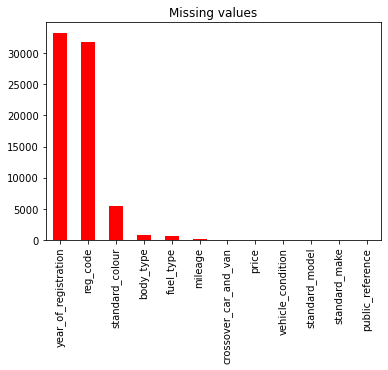

In [89]:
df.isnull().sum().sort_values(ascending=False).plot(kind='bar', color='red')
plt.title('Missing values')
plt.show()

In [90]:
df.duplicated().sum()

0

### 1.2 Analysis of Distributions

##### Numerical Features

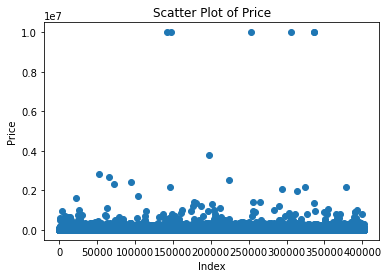

In [91]:
plt.scatter(df.index, df['price'])
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Scatter Plot of Price')
plt.show()

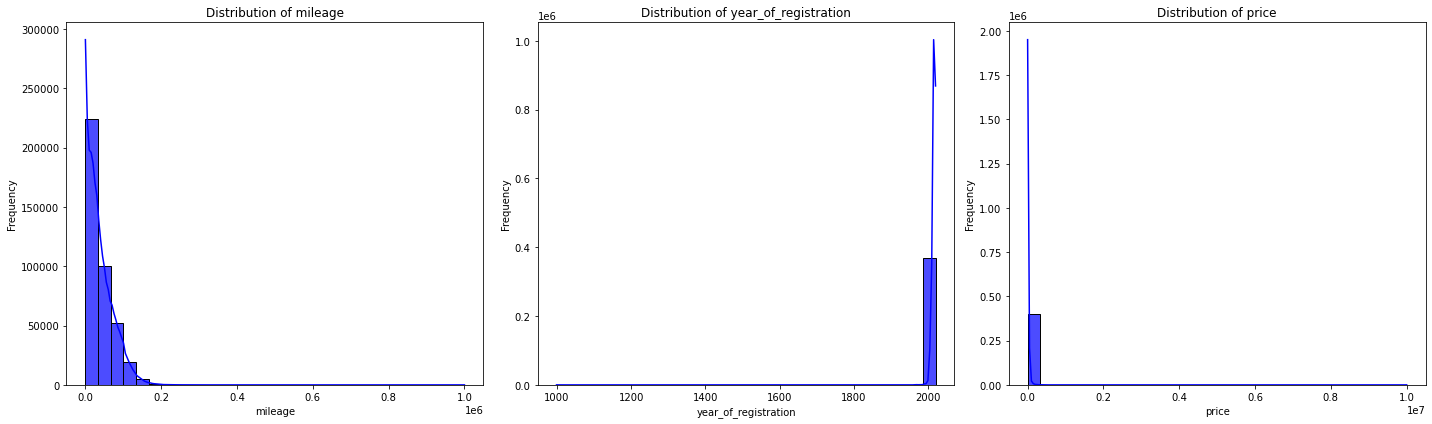

In [92]:
numerical_features = ['mileage', 'year_of_registration', 'price']

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for i, feature in enumerate(numerical_features):
    sns.histplot(df[feature].dropna(), kde=True, bins=30, color='blue', alpha=0.7, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [93]:
summary_stats = df[numerical_features].describe().T
summary_stats['skewness'] = df[numerical_features].skew()
print(summary_stats)

                         count          mean           std    min      25%  \
mileage               401878.0  37743.595656  34831.724018    0.0  10481.0   
year_of_registration  368694.0   2015.006206      7.962667  999.0   2013.0   
price                 402005.0  17341.965799  46437.460951  120.0   7495.0   

                          50%       75%        max    skewness  
mileage               28629.5  56875.75   999999.0    1.451132  
year_of_registration   2016.0   2018.00     2020.0  -87.909954  
price                 12600.0  20000.00  9999999.0  154.681527  


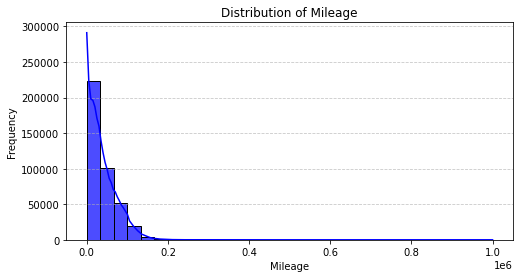

Summary statistics for 'mileage':
count    401878.000000
mean      37743.595656
std       34831.724018
min           0.000000
25%       10481.000000
50%       28629.500000
75%       56875.750000
max      999999.000000
Name: mileage, dtype: float64


In [94]:
plt.figure(figsize=(8, 4))
sns.histplot(df['mileage'].dropna(), kde=True, bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Mileage')
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("Summary statistics for 'mileage':")
print(df['mileage'].describe())

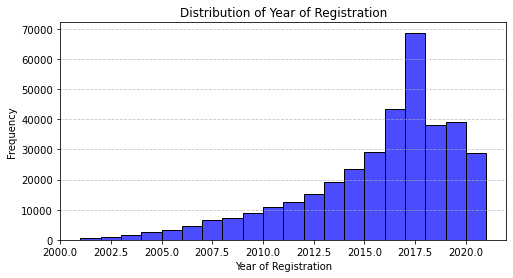

Summary statistics for 'year_of_registration':
count    368694.000000
mean       2015.006206
std           7.962667
min         999.000000
25%        2013.000000
50%        2016.000000
75%        2018.000000
max        2020.000000
Name: year_of_registration, dtype: float64


In [95]:
df_year = df[df['year_of_registration'] > 2000]['year_of_registration'].dropna()
bins = range(int(df_year.min()), int(df_year.max()) + 2)
plt.figure(figsize=(8, 4))
sns.histplot(df_year, bins=bins, color='blue', alpha=0.7)
plt.title('Distribution of Year of Registration')
plt.xlabel('Year of Registration')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("Summary statistics for 'year_of_registration':")
print(df['year_of_registration'].describe())

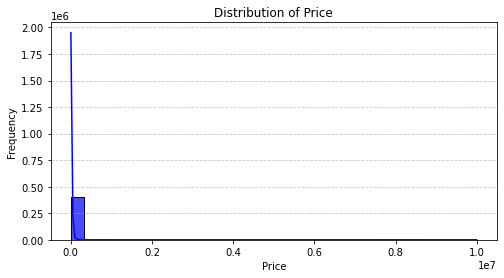

Summary statistics for 'price':
count    4.020050e+05
mean     1.734197e+04
std      4.643746e+04
min      1.200000e+02
25%      7.495000e+03
50%      1.260000e+04
75%      2.000000e+04
max      9.999999e+06
Name: price, dtype: float64


In [96]:
plt.figure(figsize=(8, 4))
sns.histplot(df['price'].dropna(), kde=True, bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("Summary statistics for 'price':")
print(df['price'].describe())

##### Categorical Features

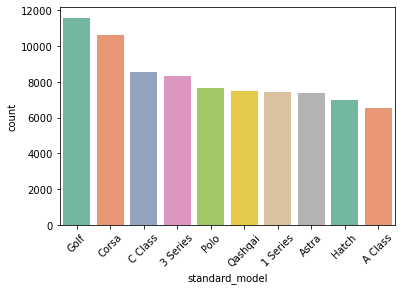

In [97]:
top_n = 10  # Top 10 categories
sns.countplot(data=df, x='standard_model', order=df['standard_model'].value_counts().index[:top_n], palette='Set2')
plt.xticks(rotation=45)
plt.show()

<AxesSubplot:xlabel='standard_colour', ylabel='count'>

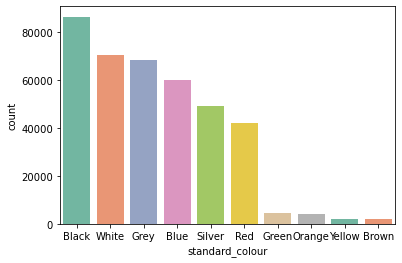

In [98]:
top_n = 10
sns.countplot(data=df, x='standard_colour', order=df['standard_colour'].value_counts().index[:top_n], palette='Set2')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'BMW'),
  Text(1, 0, 'Audi'),
  Text(2, 0, 'Volkswagen'),
  Text(3, 0, 'Vauxhall'),
  Text(4, 0, 'Mercedes-Benz'),
  Text(5, 0, 'Nissan'),
  Text(6, 0, 'Toyota'),
  Text(7, 0, 'Peugeot'),
  Text(8, 0, 'Land Rover'),
  Text(9, 0, 'Renault')])

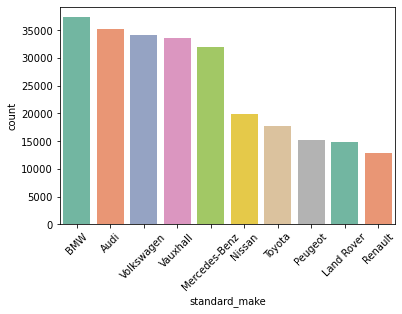

In [99]:
top_n = 10
sns.countplot(data=df, x='standard_make', order=df['standard_make'].value_counts().index[:top_n], palette='Set2')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Hatchback'),
  Text(1, 0, 'SUV'),
  Text(2, 0, 'Saloon'),
  Text(3, 0, 'Estate'),
  Text(4, 0, 'Coupe'),
  Text(5, 0, 'Convertible'),
  Text(6, 0, 'MPV'),
  Text(7, 0, 'Pickup'),
  Text(8, 0, 'Combi Van'),
  Text(9, 0, 'Limousine')])

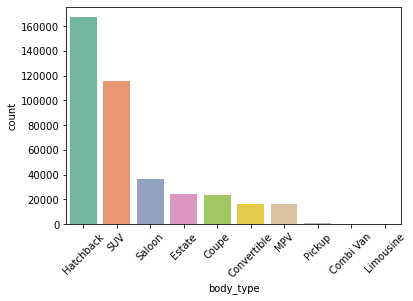

In [100]:
top_n = 10
sns.countplot(data=df, x='body_type', order=df['body_type'].value_counts().index[:top_n], palette='Set2')
plt.xticks(rotation=45)

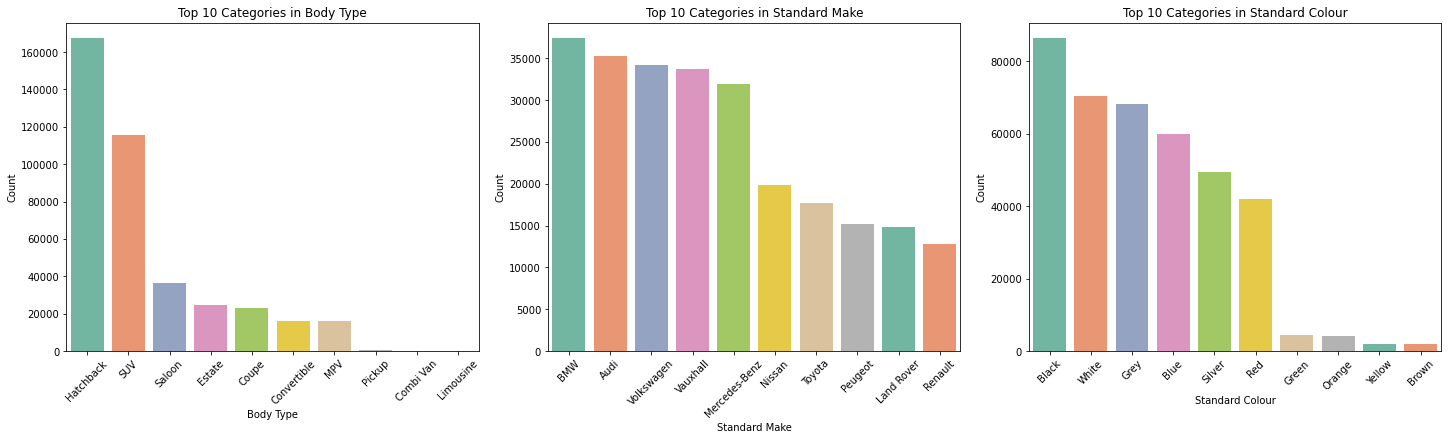

In [101]:
top_n_columns = ['body_type', 'standard_make', 'standard_colour']
n = 10

fig, axes = plt.subplots(1, len(top_n_columns), figsize=(20, 6), constrained_layout=True)

for ax, column in zip(axes, top_n_columns):
    sns.countplot(data=df, x=column, order=df[column].value_counts().index[:n], ax=ax, palette='Set2')
    ax.set_title(f'Top {n} Categories in {column.replace("_", " ").title()}')
    ax.set_xlabel(column.replace('_', ' ').title())
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)

plt.show()

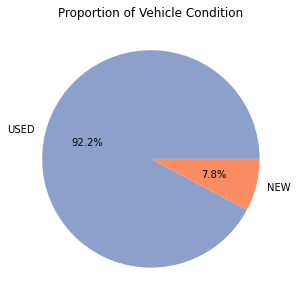

In [102]:
plt.figure(figsize=(5, 5))
plt.pie(df['vehicle_condition'].value_counts(), labels=df['vehicle_condition'].value_counts().index, autopct='%1.1f%%', colors=['#8da0cb', '#fc8d62'])
plt.title('Proportion of Vehicle Condition')
plt.show()

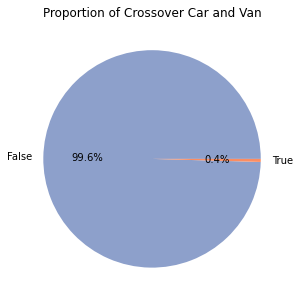

In [103]:
plt.figure(figsize=(5, 5))
plt.pie(df['crossover_car_and_van'].value_counts(), labels=df['crossover_car_and_van'].value_counts().index, autopct='%1.1f%%', colors=['#8da0cb', '#fc8d62'])
plt.title('Proportion of Crossover Car and Van')
plt.show()

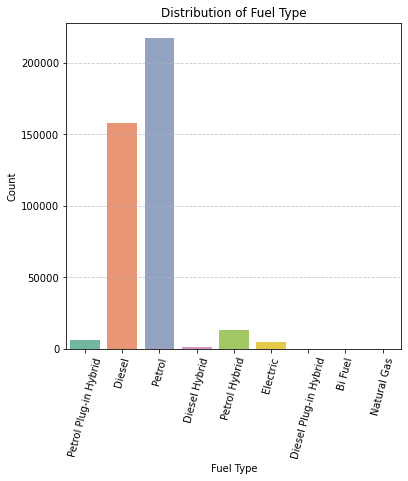

In [104]:
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='fuel_type', palette='Set2')
plt.title('Distribution of Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.xticks(rotation=75)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## **2. Data Pre-Processing**

### 2.1 Data Cleaning  

In [105]:
missing_values = pd.DataFrame(columns=['Columns', 'Unique Values', 'Missing Values'])

for i, col in enumerate(df.columns):
    missing_values.loc[i] = [col, df[col].nunique(), df[col].isnull().sum()]

print(missing_values)

                  Columns Unique Values Missing Values
0        public_reference        402005              0
1                 mileage         80634            127
2                reg_code            72          31857
3         standard_colour            22           5378
4           standard_make           110              0
5          standard_model          1168              0
6       vehicle_condition             2              0
7    year_of_registration            84          33311
8                   price         30578              0
9               body_type            16            837
10  crossover_car_and_van             2              0
11              fuel_type             9            601


In [106]:
# Filling missing values for 'year_of_registration' as 2021 for new cars
df.loc[(df['vehicle_condition'] == 'NEW') & (df['year_of_registration'].isnull()),'year_of_registration'] = 2021

# Filling missing values for 'reg_code' as 21 for new cars
df.loc[(df['vehicle_condition'] == 'NEW') & (df['reg_code'].isnull()),'reg_code'] = 21

In [107]:
def mapping_year_to_code(reg_code):
  try:
    reg_code_as_int = int(reg_code)
    if reg_code_as_int < 50:
      return 2000 + reg_code_as_int
    else:
      return 1950 + reg_code_as_int
  except ValueError:
    return None

df['year_of_registration'] = df['year_of_registration'].fillna(df['reg_code'].apply(lambda x: mapping_year_to_code(x)))

In [108]:
# Here we are filling our values with the help of: https://en.wikipedia.org/wiki/Vehicle_registration_plates_of_the_United_Kingdom

old_car_reg_code_mapping={'A': 1963, 'B': 1964, 'C': 1965, 'D': 1966, 'E': 1967, 'F': 1968, 'G': 1969, 'H': 1970, 'J': 1971, 'K': 1972,
                   'L': 1973, 'M': 1973, 'N': 1974, 'P': 1975, 'R': 1976, 'S': 1977, 'T': 1978, 'V': 1979, 'W': 1980, 'X': 1981,
                  'Y': 1982}


df['year_of_registration'] = df['year_of_registration'].fillna(df['reg_code'].str.upper().map(old_car_reg_code_mapping))

In [109]:
# Now as we are still getting missing values, there is no logic which we can apply to determine how to fill the values
# As it may be the noise of the data or incorrect values being provided to us.
# Therefore, we are going to drop our 323 null values in year_of_registration

df = df.dropna(subset=['year_of_registration'])

In [110]:
df.isnull().sum()

public_reference            0
mileage                   115
reg_code                  287
standard_colour          5352
standard_make               0
standard_model              0
vehicle_condition           0
year_of_registration        0
price                       0
body_type                 777
crossover_car_and_van       0
fuel_type                 593
dtype: int64

In [111]:
# 'mileage' column imputing values.
# For 'NEW' cars
new_vehicle_missing_mileage = df[(df['vehicle_condition'] == 'NEW') & (df['mileage'].isnull())]

print(new_vehicle_missing_mileage.shape[0])

0


In [112]:
# For 'USED' cars
current_year = 2021
df["Age"]=(current_year - df["year_of_registration"])
df["Age"].unique()

mileage_not_na = df[(df['mileage'].notnull()) & (df['vehicle_condition'] == 'USED') & (df['mileage'] != 0) & (df['Age'] > 0)]  # Exclude rows with invalid Age

# Calculate average mileage per year
average_mileage_per_year = (mileage_not_na['mileage'] / mileage_not_na['Age']).mean()
print(f"Average mileage per year: {average_mileage_per_year:.2f}")

# Fill missing mileage based on the average mileage per year and age
df.loc[df['mileage'].isnull(), 'mileage'] = (df['Age'] * average_mileage_per_year)

Average mileage per year: 6646.16


In [113]:
df[(df['vehicle_condition'] =='USED')&(df['mileage'] == 0)]

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type,Age
810,202009254208702,0.0,70,Grey,Land Rover,Range Rover Velar,USED,2020.0,52995,SUV,False,Diesel,1.0
1656,202011015669636,0.0,13,Silver,Vauxhall,Insignia,USED,2013.0,2975,Hatchback,False,Diesel,8.0
1855,202010014447366,0.0,70,Grey,Mercedes-Benz,CLA Class,USED,2020.0,34995,Estate,False,Petrol,1.0
2201,202009304376426,0.0,70,Black,Land Rover,Range Rover,USED,2020.0,82750,SUV,False,Diesel,1.0
2754,202008283030532,0.0,63,Black,Audi,A1,USED,2013.0,8000,Hatchback,False,Diesel,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
392399,202009153775246,0.0,70,NaN,Nissan,Micra,USED,2020.0,15495,Hatchback,False,Petrol,1.0
392484,202010034543274,0.0,70,Black,Audi,Q2,USED,2020.0,22300,SUV,False,Petrol,1.0
397265,202010225306510,0.0,70,Blue,SEAT,Arona,USED,2020.0,18648,SUV,False,Petrol,1.0
398534,202010094812357,0.0,70,White,Audi,E-Tron,USED,2020.0,80000,SUV,False,Electric,1.0


In [114]:
df.loc[(df['mileage'] == 0) & (df['vehicle_condition'] == 'USED') ,'mileage']=df['Age']*average_mileage_per_year
#for 355 vehicle the vehicle_condition is used and the mileage is 0, for those vehicles imputing the mileage with average mileage per year* its age

In [115]:
df.isna().sum()

public_reference            0
mileage                     0
reg_code                  287
standard_colour          5352
standard_make               0
standard_model              0
vehicle_condition           0
year_of_registration        0
price                       0
body_type                 777
crossover_car_and_van       0
fuel_type                 593
Age                         0
dtype: int64

In [116]:
df['body_type'] = df['body_type'].fillna('Unknown')
df['fuel_type'] = df['fuel_type'].fillna('Unknown')

In [117]:
df.isna().sum()

public_reference            0
mileage                     0
reg_code                  287
standard_colour          5352
standard_make               0
standard_model              0
vehicle_condition           0
year_of_registration        0
price                       0
body_type                   0
crossover_car_and_van       0
fuel_type                   0
Age                         0
dtype: int64

In [118]:
# Dropping the reg_code & public_reference columns
df = df.drop('reg_code', axis=1)

In [119]:
# Removing the outliers
first_car = 1892
curr_year = 2021

df = df[(df['year_of_registration'] >= first_car) & (df['year_of_registration'] <= curr_year)]

### 2.2 Feature Engineering

In [120]:
df['model_name'] = df['standard_make'] + ' ' + df['standard_model']
df['model_name']

0                           Volvo XC90
1                            Jaguar XF
2                           SKODA Yeti
3                       Vauxhall Mokka
4         Land Rover Range Rover Sport
                      ...             
402000                     Peugeot 208
402001                     Peugeot 107
402002                  Nissan Qashqai
402003                      Abarth 595
402004                   Audi A4 Avant
Name: model_name, Length: 401658, dtype: object

In [121]:
# Calculate the most frequent color for each 'make_model' and handle potential multiple modes
mode_colours = df.groupby('model_name')['standard_colour'].apply(lambda x: x.mode()[0] if not x.mode().empty else None)

# Replace only missing values in 'standard_colour' with the most frequent colour for each 'make_model'
df['standard_colour'] = df['standard_colour'].fillna(df['model_name'].map(mode_colours))

print(df[['model_name', 'standard_colour']].head())

                     model_name standard_colour
0                    Volvo XC90            Grey
1                     Jaguar XF            Blue
2                    SKODA Yeti            Grey
3                Vauxhall Mokka           Brown
4  Land Rover Range Rover Sport            Grey


In [122]:
print(df[['model_name', 'standard_colour']].head())

                     model_name standard_colour
0                    Volvo XC90            Grey
1                     Jaguar XF            Blue
2                    SKODA Yeti            Grey
3                Vauxhall Mokka           Brown
4  Land Rover Range Rover Sport            Grey


In [123]:
df.isnull().sum()

public_reference          0
mileage                   0
standard_colour          24
standard_make             0
standard_model            0
vehicle_condition         0
year_of_registration      0
price                     0
body_type                 0
crossover_car_and_van     0
fuel_type                 0
Age                       0
model_name                0
dtype: int64

In [124]:
df['standard_colour'] = df['standard_colour'].fillna('Others')

In [125]:
df.isnull().sum()

public_reference         0
mileage                  0
standard_colour          0
standard_make            0
standard_model           0
vehicle_condition        0
year_of_registration     0
price                    0
body_type                0
crossover_car_and_van    0
fuel_type                0
Age                      0
model_name               0
dtype: int64

In [126]:
df['average_mileage_per_year'] = df['mileage'] / df['Age'].replace(0,1)

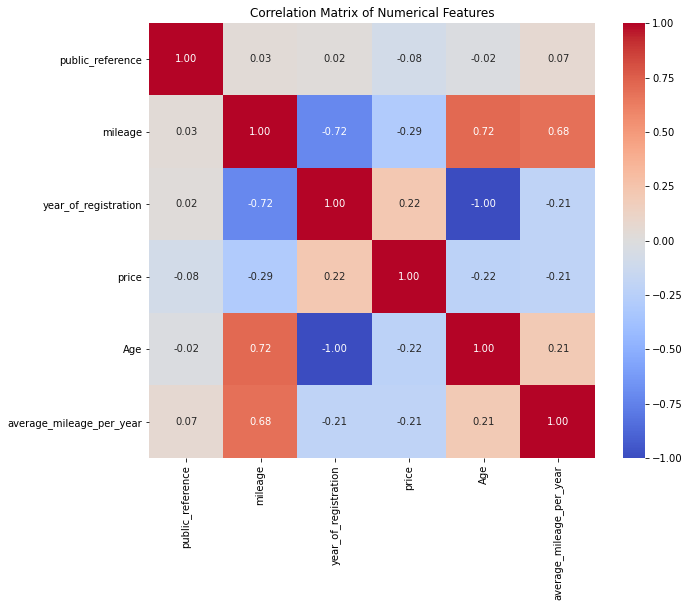

In [127]:
numerical_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### 2.3 Subsetting  

In [128]:
df.columns

Index(['public_reference', 'mileage', 'standard_colour', 'standard_make',
       'standard_model', 'vehicle_condition', 'year_of_registration', 'price',
       'body_type', 'crossover_car_and_van', 'fuel_type', 'Age', 'model_name',
       'average_mileage_per_year'],
      dtype='object')

##### Business Insight 1:

In [129]:
df_filtered = df[(df['mileage'] < 100000) & (df['vehicle_condition'].isin(['USED', 'NEW']))]

In [130]:
df_grouped = df_filtered.groupby('fuel_type').agg({
    'price': 'mean',
    'mileage': 'mean'
}).reset_index()

print(df_grouped)

               fuel_type         price       mileage
0                Bi Fuel  14929.632558   5653.548837
1                 Diesel  17763.953547  40510.598061
2          Diesel Hybrid  41397.299045  11514.188218
3  Diesel Plug-in Hybrid  35954.412088  19236.056752
4               Electric  32750.575948  10438.474258
5                 Petrol  16808.235950  27899.848640
6          Petrol Hybrid  20751.607564  21728.969960
7  Petrol Plug-in Hybrid  35814.969637  18945.532493
8                Unknown  61674.393993  19588.049737


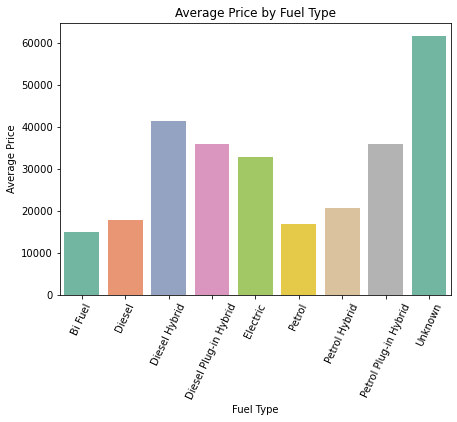

In [131]:
plt.figure(figsize=(7, 5))
sns.barplot(x='fuel_type', y='price', data=df_grouped, palette='Set2')
plt.title('Average Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Price')
plt.xticks(rotation=65)
plt.show()

###### **Insight**:
- From the bar plot and the grouped data, we can observe that the Diesel Hybrid and Petrol Plug-in Hybrid fuel types have the highest average prices at around £41,400 and £36,251 respectively. In contrast, Bi Fuel cars have the lowest average price at around £14,929, followed by Petrol cars with an average price of £17,133.

###### Business Strategy:
- Promote Electric Vehicles:
Government Incentives: Emphasize the environmental benefits of electric vehicles (EVs) and leverage government subsidies and incentives to make EVs more attractive to buyers. With an average price of £32,768, these vehicles can be positioned as modern, sustainable alternatives.
- Cost Savings Messaging: Focus on the long-term cost savings associated with electric vehicles, such as lower fuel and maintenance costs, as a selling point.
- Targeted Advertising for High-End Models: Highlight features like advanced fuel efficiency, reduced emissions, and long-term savings to attract environmentally conscious buyers willing to pay a premium.

##### Business Insight 2:

In [132]:
df_filtered = df[df['vehicle_condition'].isin(['USED', 'NEW'])]

In [133]:
df_grouped = df_filtered.groupby(['body_type', 'vehicle_condition']).agg({
    'price': 'mean',
    'mileage': 'mean'
}).reset_index()

In [134]:
df_grouped_sorted = df_grouped.sort_values(by='price', ascending=False)
print(df_grouped_sorted)

          body_type vehicle_condition         price        mileage
13        Limousine              USED  58757.449367   80221.088608
7             Coupe               NEW  55624.437666       9.537135
26          Unknown              USED  46689.138075   40624.445511
23           Saloon               NEW  43461.319194       6.310180
5       Convertible               NEW  40105.798365       5.023161
16          Minibus               NEW  39935.000000      10.000000
21              SUV               NEW  38125.806350       5.105915
9            Estate               NEW  37462.720141       5.201413
3         Combi Van               NEW  36336.653846      12.115385
0            Camper              USED  33197.584416   53493.558442
8             Coupe              USED  32474.304137   44135.552742
25          Unknown               NEW  31864.321429       7.785714
19           Pickup               NEW  30135.935484      13.306452
14              MPV               NEW  29510.039039       5.18

<AxesSubplot:xlabel='price', ylabel='body_type'>

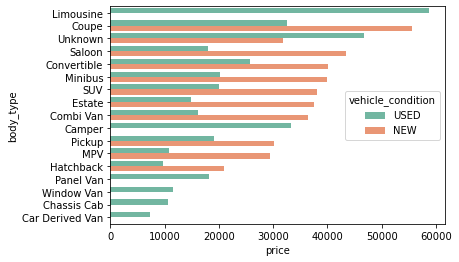

In [135]:
sns.barplot(x='price', y='body_type', hue='vehicle_condition', data=df_grouped_sorted, palette='Set2')

In [136]:
new_vehicle_avg_price = df_grouped_sorted[df_grouped_sorted['vehicle_condition'] == 'NEW']['price']
used_vehicle_avg_price = df_grouped_sorted[df_grouped_sorted['vehicle_condition'] == 'USED']['price']

for idx, row in df_grouped_sorted.iterrows():
    body_type = row['body_type']
    condition = row['vehicle_condition']
    price = row['price']
    mileage = row['mileage']

    if condition == 'NEW' and price > 25000:
        print(f"High-end new vehicle found: {body_type} with a price of £{price:.2f} and mileage of {mileage:.0f} miles.")

    if condition == 'USED' and mileage > 80000:
        print(f"Used vehicle with high mileage: {body_type} with {mileage:.0f} miles and a price of £{price:.2f}.")

Used vehicle with high mileage: Limousine with 80221 miles and a price of £58757.45.
High-end new vehicle found: Coupe with a price of £55624.44 and mileage of 10 miles.
High-end new vehicle found: Saloon with a price of £43461.32 and mileage of 6 miles.
High-end new vehicle found: Convertible with a price of £40105.80 and mileage of 5 miles.
High-end new vehicle found: Minibus with a price of £39935.00 and mileage of 10 miles.
High-end new vehicle found: SUV with a price of £38125.81 and mileage of 5 miles.
High-end new vehicle found: Estate with a price of £37462.72 and mileage of 5 miles.
High-end new vehicle found: Combi Van with a price of £36336.65 and mileage of 12 miles.
High-end new vehicle found: Unknown with a price of £31864.32 and mileage of 8 miles.
High-end new vehicle found: Pickup with a price of £30135.94 and mileage of 13 miles.
High-end new vehicle found: MPV with a price of £29510.04 and mileage of 5 miles.
Used vehicle with high mileage: Window Van with 86710 mile

###### **Insight**:
- From the bar plot and the grouped data, we observe that Limousine vehicles, in the USED condition, have the highest average price of £58,953.91, despite having high mileage of around 80,094 miles. This indicates that even older vehicles with higher mileage can retain substantial value. On the other hand, Used vehicles like Car Derived Van and Window Van have significantly lower prices, reflecting their higher mileage of over 80,000 miles and lower demand in the market.

- For NEW vehicles, the Coupe has the highest average price at £55,624.44, followed by the Saloon and Convertible at £43,461.32 and £40,105.80, respectively. These high-end models showcase a focus on luxury and advanced features, with low mileage of around 10 miles.

###### **Business Strategy**:
- Target High-End New Vehicles to Premium Customers: The NEW high-end vehicles such as Coupe, Saloon, and Convertible can be marketed to customers looking for premium features and luxury. Highlight the low mileage, advanced features, and long-term value.
- Emphasize Technology and Luxury: Focus on cutting-edge technology, design, and sustainability (for hybrid/electric models) to attract high-income buyers.
- Exclusive Offers: Create financing or leasing options to make these premium models more accessible to a wider audience.
- Promote Used Vehicles with High Mileage as Affordable Options: Vehicles like Limousine, despite their high mileage, maintain strong prices, indicating that there is a market for used vehicles with significant mileage. These can be promoted as reliable, budget-friendly alternatives to new vehicles, especially for cost-conscious buyers.
- Highlight Value for Money: Emphasize the affordability and the fact that these vehicles still offer value at a lower price point.
- Target Cost-Conscious Consumers: Market these vehicles to buyers looking for reliable transportation without the new vehicle price tag, especially in areas where mileage is less of a concern.

##### **Business Insight 3**:

In [137]:
df_grouped = df.groupby(['model_name', 'standard_colour']).agg({
    'Age': 'mean',
    'average_mileage_per_year': 'mean',
    'price': 'mean',
    'public_reference': 'count'
}).reset_index()

In [138]:
df_grouped.rename(columns={
    'Age': 'avg_age',
    'average_mileage_per_year': 'avg_mileage_per_year',
    'price': 'avg_price',
    'public_reference': 'vehicle_count'
}, inplace=True)

In [139]:
df_grouped_sorted = df_grouped.sort_values(by='avg_price', ascending=False)

print(df_grouped_sorted.head(10))

             model_name standard_colour  avg_age  avg_mileage_per_year  \
1152     Bugatti Chiron            Blue      3.0            333.333333   
1842  Ferrari LaFerrari             Red      6.4            342.373810   
4300      Pagani Huayra           White      3.0            633.333333   
1843  Ferrari LaFerrari          Yellow      6.0             79.166667   
1805       Ferrari Enzo          Others     17.0            455.882353   
1154     Bugatti Veyron            Blue      8.0           1188.590909   
1153     Bugatti Veyron           Black      9.0           1056.907937   
1818        Ferrari F40             Red     29.0             96.551724   
3579         McLaren P1          Orange      8.0             44.125000   
3580         McLaren P1          Yellow      8.0            457.500000   

      avg_price  vehicle_count  
1152  2500000.0              1  
1842  2468989.0              5  
4300  2400000.0              1  
1843  2299950.0              1  
1805  1950000.0     

<AxesSubplot:xlabel='avg_price', ylabel='model_name'>

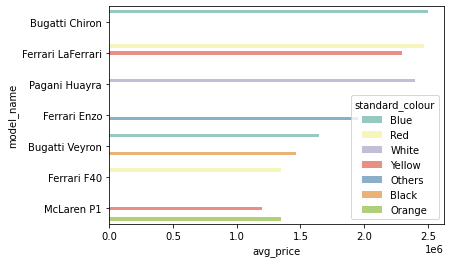

In [140]:
sns.barplot(
    x='avg_price',
    y='model_name',
    hue='standard_colour',
    data=df_grouped_sorted.head(10),
    palette='Set3'
)

In [141]:
for idx, row in df_grouped_sorted.iterrows():
    model_name = row['model_name']
    colour = row['standard_colour']
    avg_price = row['avg_price']
    avg_age = row['avg_age']
    avg_mileage_per_year = row['avg_mileage_per_year']

    if avg_price > 40000 and avg_mileage_per_year < 8000:
        print(f"Premium vehicle: {model_name} ({colour}) - Avg. Price £{avg_price:.2f}, Avg. Age {avg_age:.1f} years, Avg. Mileage {avg_mileage_per_year:.0f} miles/year.")
    if avg_price < 15000 and avg_mileage_per_year > 12000:
        print(f"Budget-friendly high-mileage vehicle: {model_name} ({colour}) - Avg. Price £{avg_price:.2f}, Avg. Age {avg_age:.1f} years, Avg. Mileage {avg_mileage_per_year:.0f} miles/year.")

Premium vehicle: Bugatti Chiron (Blue) - Avg. Price £2500000.00, Avg. Age 3.0 years, Avg. Mileage 333 miles/year.
Premium vehicle: Ferrari LaFerrari (Red) - Avg. Price £2468989.00, Avg. Age 6.4 years, Avg. Mileage 342 miles/year.
Premium vehicle: Pagani Huayra (White) - Avg. Price £2400000.00, Avg. Age 3.0 years, Avg. Mileage 633 miles/year.
Premium vehicle: Ferrari LaFerrari (Yellow) - Avg. Price £2299950.00, Avg. Age 6.0 years, Avg. Mileage 79 miles/year.
Premium vehicle: Ferrari Enzo (Others) - Avg. Price £1950000.00, Avg. Age 17.0 years, Avg. Mileage 456 miles/year.
Premium vehicle: Bugatti Veyron (Blue) - Avg. Price £1644997.50, Avg. Age 8.0 years, Avg. Mileage 1189 miles/year.
Premium vehicle: Bugatti Veyron (Black) - Avg. Price £1468000.00, Avg. Age 9.0 years, Avg. Mileage 1057 miles/year.
Premium vehicle: Ferrari F40 (Red) - Avg. Price £1350000.00, Avg. Age 29.0 years, Avg. Mileage 97 miles/year.
Premium vehicle: McLaren P1 (Orange) - Avg. Price £1350000.00, Avg. Age 8.0 years,

###### **Insight**:
- The dataset highlights two distinct segments in the automobile market: premium and budget-friendly vehicles. Premium models like the Ferrari LaFerrari, Bugatti Veyron, and Porsche 918 stand out for their exceptional pricing, low mileage, and vibrant colors such as yellow and blue. These vehicles are primarily sought after by luxury enthusiasts and collectors, with their average mileage often reflecting limited usage, which adds to their appeal as investment-grade assets. Conversely, budget-friendly vehicles like the Toyota Sienta, Vauxhall Combo, and Dodge RAM cater to a different demographic, offering affordability and utility. These models demonstrate high average mileage, indicating their popularity among cost-conscious buyers who prioritize functionality and durability. Additionally, unique colors like pink and multicolor in the budget segment suggest opportunities to cater to niche preferences.

###### **Business Stratergy**:
- For premium vehicles, a strategy centered around exclusivity and prestige is essential. Collaborating with luxury brands or hosting exclusive events could enhance their desirability. Marketing efforts should emphasize their rarity, investment potential, and distinctive aesthetics to appeal to high-net-worth individuals and collectors. In contrast, the budget-friendly segment should focus on practical messaging that highlights value for money, reliability, and fuel efficiency. Offering tailored financing options, maintenance packages, and flexible ownership solutions, such as leasing, could broaden their appeal. Furthermore, leveraging digital platforms to create targeted campaigns that emphasize unique color options and utility features can attract diverse buyer groups in the budget market. This bifurcated approach ensures optimal positioning across both segments.

## **3. Analysis of Associations and Group Differences**

### 3.1 Quantitative - Quantitative  

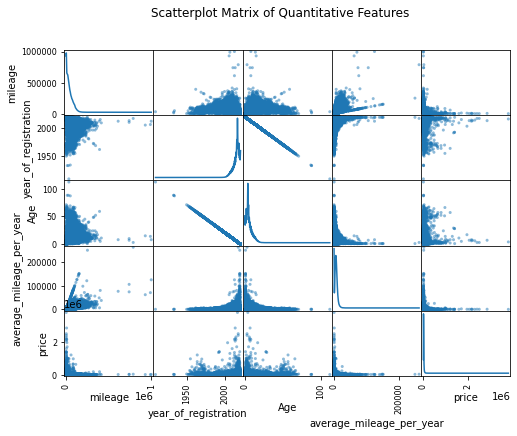

In [142]:
from pandas.plotting import scatter_matrix

scatter_matrix(df[['mileage', 'year_of_registration', 'Age', 'average_mileage_per_year', 'price']], figsize=(8, 6), diagonal='kde')
plt.suptitle('Scatterplot Matrix of Quantitative Features')
plt.show()

mileage_year_group
Low       17317.075264
Medium    12166.848890
High      11467.340693
Name: price, dtype: float64


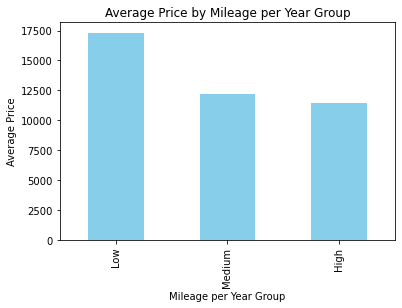

In [143]:
df['mileage_year_group'] = pd.cut(df['average_mileage_per_year'], bins=[0, 10000, 20000, 50000], labels=['Low', 'Medium', 'High'])

grouped = df.groupby('mileage_year_group')['price'].mean()
print(grouped)

grouped.plot(kind='bar', color='skyblue')
plt.title('Average Price by Mileage per Year Group')
plt.xlabel('Mileage per Year Group')
plt.ylabel('Average Price')
plt.show()

mileage_group           Low        Medium          High
age_group                                              
0-3            24833.640781  15818.755152  11411.083333
4-7            15579.695142  12418.696207   9305.949136
8+             12747.122902   6428.812430   4513.333828


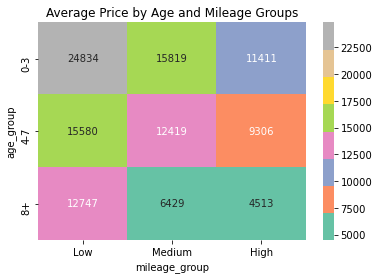

In [144]:
# Creating age and mileage bins
df['age_group'] = pd.cut(df['Age'], bins=[0, 3, 7, 15], labels=['0-3', '4-7', '8+'])
df['mileage_group'] = pd.cut(df['mileage'], bins=[0, 50000, 100000, 150000], labels=['Low', 'Medium', 'High'])

grouped = df.groupby(['age_group', 'mileage_group'])['price'].mean().unstack()
print(grouped)

sns.heatmap(grouped, annot=True, fmt=".0f", cmap='Set2')
plt.title('Average Price by Age and Mileage Groups')
plt.show()

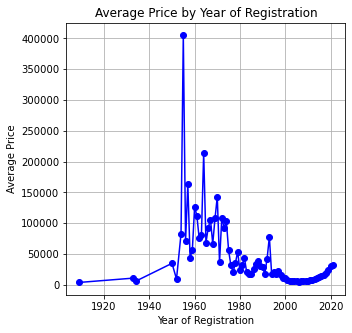

In [145]:
# Calculate average price by year of registration
yearly_avg_price = df.groupby('year_of_registration')['price'].mean()

plt.figure(figsize=(5, 5))
plt.plot(yearly_avg_price.index, yearly_avg_price.values, marker='o', linestyle='-', color='blue')
plt.title('Average Price by Year of Registration')
plt.xlabel('Year of Registration')
plt.ylabel('Average Price')
plt.grid()
plt.show()

### 3.2 Quantitative - Categorical

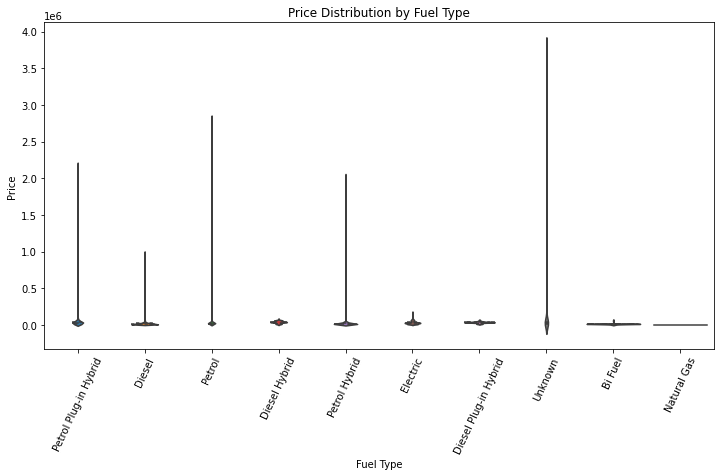

In [146]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='fuel_type', y='price', data=df, inner='quart')
plt.title("Price Distribution by Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("Price")
plt.xticks(rotation=65)
plt.show()

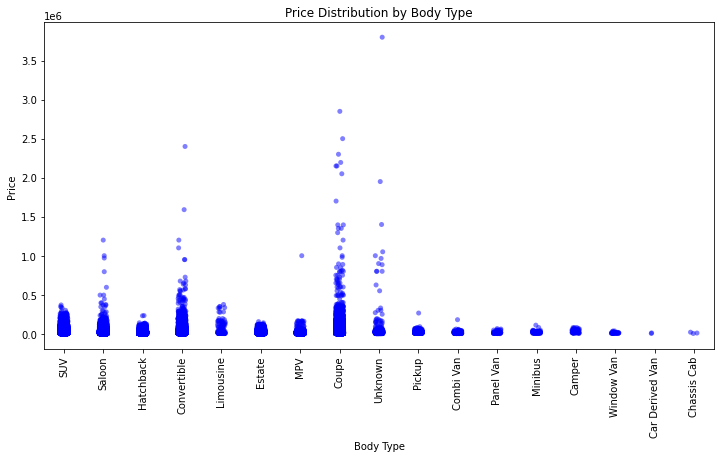

In [147]:
plt.figure(figsize=(12, 6))
sns.stripplot(x='body_type', y='price', data=df, jitter=True, color='blue', alpha=0.5)
plt.title("Price Distribution by Body Type")
plt.xlabel("Body Type")
plt.ylabel("Price")
plt.xticks(rotation=90)
plt.show()

vehicle_condition
NEW     32846.232359
USED    15842.319666
Name: price, dtype: float64


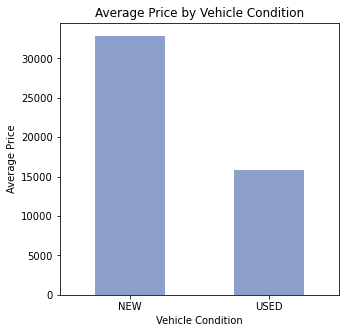

In [148]:
grouped_condition = df.groupby('vehicle_condition')['price'].mean()
print(grouped_condition)
plt.figure(figsize=(5, 5))
grouped_condition.plot(kind='bar', color='#8da0cb')
plt.title('Average Price by Vehicle Condition')
plt.xlabel('Vehicle Condition')
plt.ylabel('Average Price')
plt.xticks(rotation=0)
plt.show()

body_type
Camper             33197.584416
Car Derived Van     7245.000000
Chassis Cab        10598.333333
Combi Van          18673.341121
Convertible        26345.315135
Coupe              33226.326914
Estate             16158.760818
Hatchback          10438.502954
Limousine          58757.449367
MPV                11213.033167
Minibus            20577.684564
Panel Van          18154.350000
Pickup             20169.291734
SUV                22470.201207
Saloon             19313.665438
Unknown            45615.153946
Window Van         11588.050000
Name: price, dtype: float64


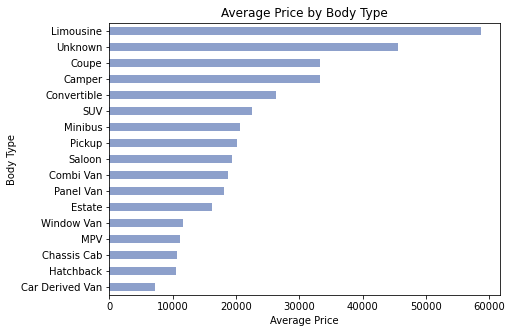

In [149]:
grouped_body_type = df.groupby('body_type')['price'].mean()
print(grouped_body_type)

plt.figure(figsize=(7,5))
grouped_body_type.sort_values().plot(kind='barh', color='#8da0cb')
plt.title('Average Price by Body Type')
plt.xlabel('Average Price')
plt.ylabel('Body Type')
plt.show()

fuel_type
Bi Fuel                    9106.393665
Diesel                    49263.544499
Diesel Hybrid             14905.305891
Diesel Plug-in Hybrid     20636.153129
Electric                  10592.602015
Natural Gas              160000.000000
Petrol                    31469.472577
Petrol Hybrid             25514.767190
Petrol Plug-in Hybrid     19981.294931
Unknown                   25445.582140
Name: mileage, dtype: float64


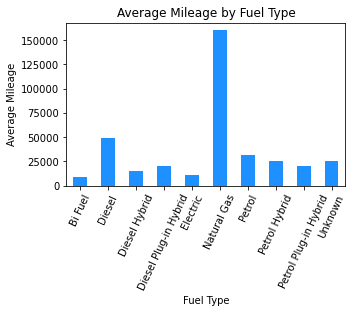

In [150]:
# Grouping by fuel type and calculating average mileage
grouped_fuel_type = df.groupby('fuel_type')['mileage'].mean()
print(grouped_fuel_type)

plt.figure(figsize=(5,3))
grouped_fuel_type.plot(kind='bar', color='dodgerblue')
plt.title('Average Mileage by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Mileage')
plt.xticks(rotation=65)
plt.show()

fuel_type                Bi Fuel        Diesel  Diesel Hybrid  \
mileage_year_group                                              
Low                 16290.134146  17318.245718   39064.064935   
Medium               2500.000000  12142.462439   15523.124031   
High                 6999.000000  10870.996482   12352.153846   

fuel_type           Diesel Plug-in Hybrid      Electric  Natural Gas  \
mileage_year_group                                                     
Low                          38167.784722  31910.554611       3795.0   
Medium                       24568.548387  26517.995413          NaN   
High                         25818.571429  35399.444444          NaN   

fuel_type                 Petrol  Petrol Hybrid  Petrol Plug-in Hybrid  \
mileage_year_group                                                       
Low                 16223.405572   20205.246923           36552.318182   
Medium              11161.772779   13888.605311           19510.569231   
High             

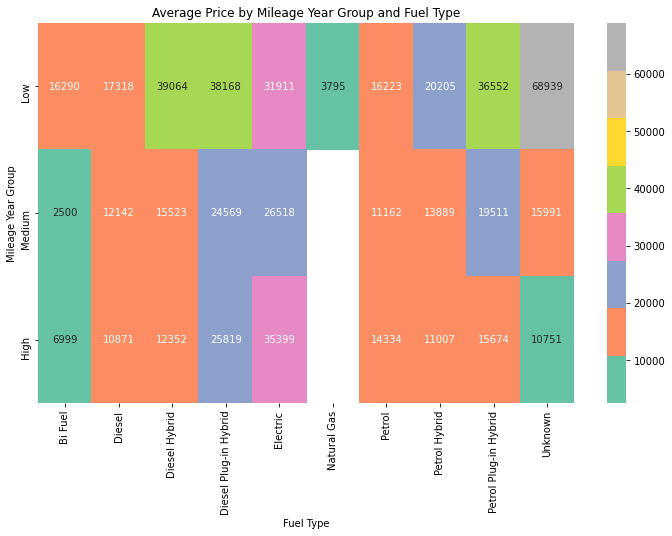

In [151]:
# Grouping by mileage_year_group and fuel_type, and calculating average price
grouped_combined = df.groupby(['mileage_year_group', 'fuel_type'])['price'].mean().unstack()
print(grouped_combined)

plt.figure(figsize=(12,7))
sns.heatmap(grouped_combined, annot=True, fmt=".0f", cmap='Set2')
plt.title('Average Price by Mileage Year Group and Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Mileage Year Group')
plt.show()

### 3.3 Categorical - Categorical

In [152]:
df.columns

Index(['public_reference', 'mileage', 'standard_colour', 'standard_make',
       'standard_model', 'vehicle_condition', 'year_of_registration', 'price',
       'body_type', 'crossover_car_and_van', 'fuel_type', 'Age', 'model_name',
       'average_mileage_per_year', 'mileage_year_group', 'age_group',
       'mileage_group'],
      dtype='object')

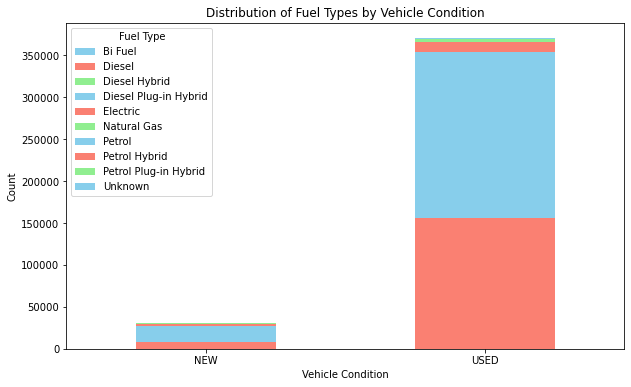

In [153]:
# Cross-tabulation of vehicle condition and fuel type
condition_fuel = pd.crosstab(df['vehicle_condition'], df['fuel_type'])

condition_fuel.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'salmon', 'lightgreen'])
plt.title('Distribution of Fuel Types by Vehicle Condition')
plt.xlabel('Vehicle Condition')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Fuel Type')
plt.show()

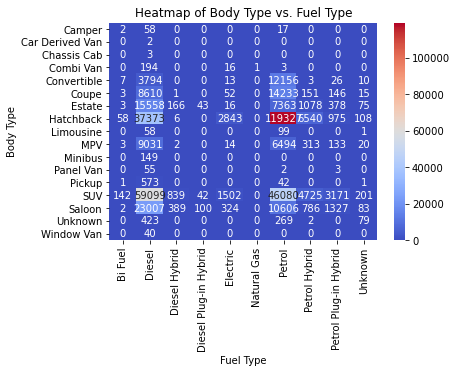

In [154]:
# body type and fuel type
body_fuel = pd.crosstab(df['body_type'], df['fuel_type'])

sns.heatmap(body_fuel, annot=True, fmt="d", cmap="coolwarm", cbar=True)
plt.title('Heatmap of Body Type vs. Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Body Type')
plt.show()

<Figure size 360x360 with 0 Axes>

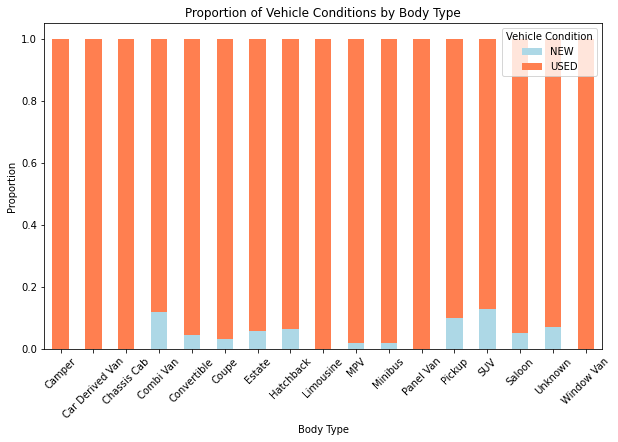

In [155]:
# Normalized cross-tabulation to show proportions
body_condition = pd.crosstab(df['body_type'], df['vehicle_condition'], normalize='index')

plt.figure(figsize=(5,5))
body_condition.plot(kind='bar', stacked=True, figsize=(10, 6), color=['lightblue', 'coral', 'limegreen'])
plt.title('Proportion of Vehicle Conditions by Body Type')
plt.xlabel('Body Type')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Vehicle Condition')
plt.show()

vehicle_condition     NEW    USED
mileage_year_group               
Low                 15397  312447
Medium                  0   54616
High                    0    3261


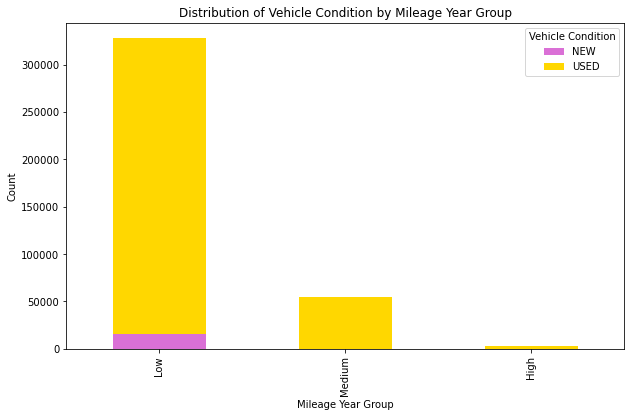

In [156]:
# mileage year group and vehicle condition
mileage_condition = pd.crosstab(df['mileage_year_group'], df['vehicle_condition'])
print(mileage_condition)

mileage_condition.plot(kind='bar', stacked=True, figsize=(10, 6), color=['orchid', 'gold', 'skyblue'])
plt.title('Distribution of Vehicle Condition by Mileage Year Group')
plt.xlabel('Mileage Year Group')
plt.ylabel('Count')
plt.legend(title='Vehicle Condition')
plt.show()

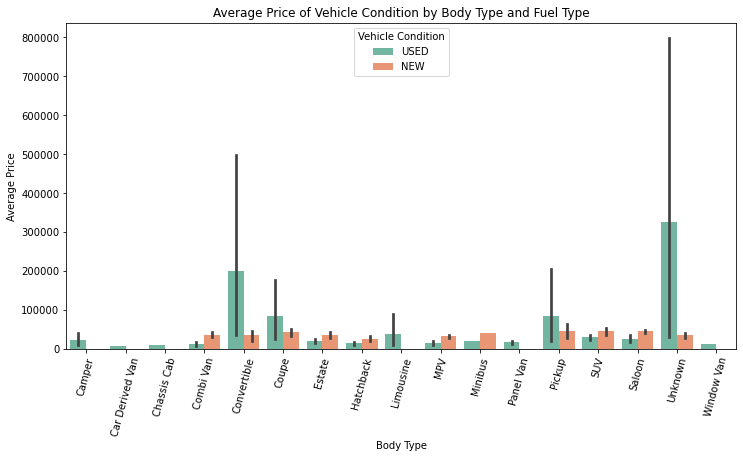

In [157]:
plt.figure(figsize=(12, 6))
data_grouped = df.groupby(['body_type', 'vehicle_condition', 'fuel_type']).agg({'price': 'mean'}).reset_index()

sns.barplot(x='body_type', y='price', hue='vehicle_condition', data=data_grouped, dodge=True, palette='Set2')
plt.title("Average Price of Vehicle Condition by Body Type and Fuel Type")
plt.xlabel("Body Type")
plt.ylabel("Average Price")
plt.xticks(rotation=75)
plt.legend(title='Vehicle Condition')
plt.show()

In [158]:
body_condition_data = df.groupby(['body_type', 'vehicle_condition']).agg({'price': 'mean'}).reset_index()
body_condition_data = body_condition_data.rename(columns={'price': 'avg_price'})

labels = body_condition_data.apply(lambda x: f"{x['body_type']}\n{x['vehicle_condition']} ({x['avg_price']:.2f})", axis=1)

import plotly.express as px

fig = px.treemap(body_condition_data,
                  path=['body_type', 'vehicle_condition'],
                  values='avg_price',
                  hover_data=['avg_price'],
                  title="Treemap of Body Type and Vehicle Condition with Average Price")
fig.show()